In [1]:
!pip install tensorflow

  Using cached tensorflow-2.12.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp310-cp310-win_amd64.whl (272.8 MB)


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras

# Load the dataset
url = "https://drive.google.com/file/d/1_Pu1E-CqZcuNRZ3crNeStJzNhwD70Yde/view?usp=share_link"
file_id = url.split("/")[-2]
download_url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv('Churn_Modelling (1).csv')

# Drop unnecessary columns
df = df.drop(["RowNumber","CustomerId", "Surname"], axis=1)

# Handle null values
df = df.dropna()

# Handling duplicate records
df = df.drop_duplicates()

# Perform label encoding for categorical columns
label_encoder = LabelEncoder()
df["Geography"] = label_encoder.fit_transform(df["Geography"])
df["Gender"] = label_encoder.fit_transform(df["Gender"])


In [30]:
# Split data into X (independent variables) and y (dependent variable - Exited)
x = df.drop("Exited", axis=1)
y = df["Exited"]

In [59]:
# Split data into training and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [60]:
# Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [61]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [62]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 10)
(2500, 10)
(7500,)
(2500,)


In [63]:
# Build the ANN model
model = Sequential()
model.add(Dense(units=6, activation='relu', input_shape=(10,)))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
    
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 6)                 66        
                                                                 
 dense_16 (Dense)            (None, 6)                 42        
                                                                 
 dense_17 (Dense)            (None, 1)                 7         
                                                                 
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [64]:
h = model.fit(x_train,y_train,batch_size=32, epochs=100, verbose=1,validation_data=(x_test,y_test))

Epoch 1/100
235/235 [==============================] - 1s 3ms/step - loss: 0.5502 - accuracy: 0.7624 - val_loss: 0.4810 - val_accuracy: 0.8012
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4710 - accuracy: 0.7947 - val_loss: 0.4500 - val_accuracy: 0.8012
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4514 - accuracy: 0.7971 - val_loss: 0.4384 - val_accuracy: 0.8076
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4419 - accuracy: 0.8061 - val_loss: 0.4312 - val_accuracy: 0.8080
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4348 - accuracy: 0.8096 - val_loss: 0.4254 - val_accuracy: 0.8132
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4293 - accuracy: 0.8148 - val_loss: 0.4204 - val_accuracy: 0.8180
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4244 - accuracy: 0.8181 - val_loss: 0.4160 - val_accuracy: 0.8220

Epoch 58/100
235/235 [==============================] - 1s 2ms/step - loss: 0.3542 - accuracy: 0.8517 - val_loss: 0.3532 - val_accuracy: 0.8576
Epoch 59/100
235/235 [==============================] - 1s 2ms/step - loss: 0.3536 - accuracy: 0.8548 - val_loss: 0.3531 - val_accuracy: 0.8592
Epoch 60/100
235/235 [==============================] - 1s 2ms/step - loss: 0.3534 - accuracy: 0.8527 - val_loss: 0.3542 - val_accuracy: 0.8572
Epoch 61/100
235/235 [==============================] - 1s 2ms/step - loss: 0.3525 - accuracy: 0.8539 - val_loss: 0.3506 - val_accuracy: 0.8580
Epoch 62/100
235/235 [==============================] - 1s 2ms/step - loss: 0.3519 - accuracy: 0.8541 - val_loss: 0.3504 - val_accuracy: 0.8588
Epoch 63/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3519 - accuracy: 0.8541 - val_loss: 0.3507 - val_accuracy: 0.8580
Epoch 64/100
235/235 [==============================] - 1s 2ms/step - loss: 0.3513 - accuracy: 0.8540 - val_loss: 0.3490 - val_accuracy:

In [65]:
r = pd.DataFrame(h.history)
r['Epochs'] = h.epoch
r.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
95,0.341294,0.860800,0.343429,0.8620,95
96,0.340731,0.857733,0.345296,0.8624,96
97,0.341871,0.859467,0.344209,0.8640,97
98,0.341568,0.859067,0.344606,0.8636,98
99,0.341480,0.857067,0.344097,0.8596,99


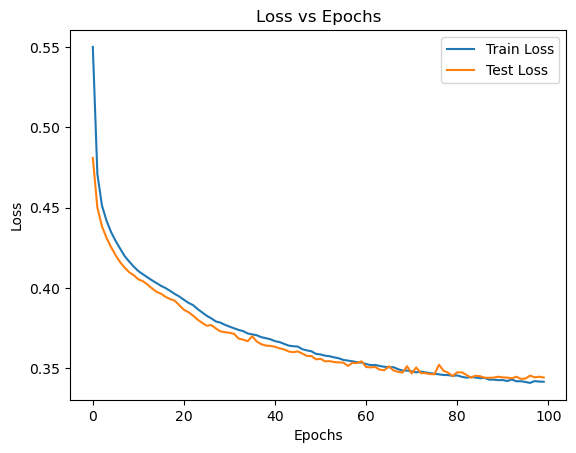

In [66]:
plt.plot(r['Epochs'],r['loss'],label='Train Loss')
plt.plot(r['Epochs'],r['val_loss'],label='Test Loss')
plt.legend()
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

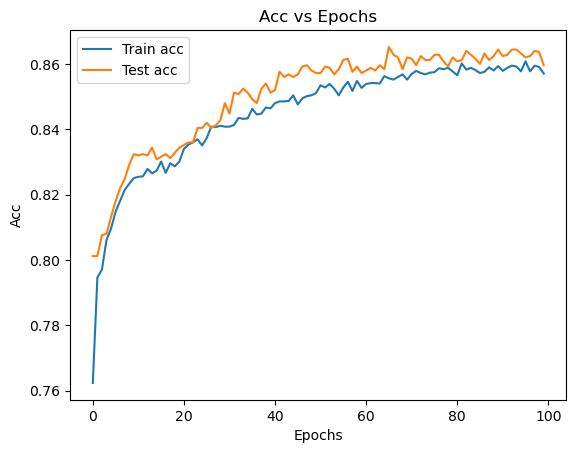

In [67]:
plt.plot(r['Epochs'],r['accuracy'],label='Train acc')
plt.plot(r['Epochs'],r['val_accuracy'],label='Test acc')
plt.legend()
plt.title('Acc vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.show()

In [70]:
# Generate predictions for test dataset
y_pred = model.predict(x_test)
y_pred[:5]

79/79 [==============================] - 0s 1ms/step


array([[0.07481308],
       [0.01930519],
       [0.17133465],
       [0.16834885],
       [0.04810698]], dtype=float32)

In [72]:
y_pred_model = [1 if i>0.5 else 0 for i in y_pred]
print(y_pred_model)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 

In [75]:
# Compute confusion matrix
print(confusion_matrix(y_test,y_pred_model))

# Compute classification report
print(classification_report(y_test,y_pred_model))

[[1906   97]
 [ 254  243]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2003
           1       0.71      0.49      0.58       497

    accuracy                           0.86      2500
   macro avg       0.80      0.72      0.75      2500
weighted avg       0.85      0.86      0.85      2500



In [77]:
# Calculate accuracy
accuracy = (confusion_matrix(y_test,y_pred_model)[0, 0] + confusion_matrix(y_test,y_pred_model)[1, 1]) / confusion_matrix(y_test,y_pred_model).sum()
print("ANN Model Accuracy:", accuracy)

ANN Model Accuracy: 0.8596
